In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv("/Users/sarakulshrestha/Desktop/PROJECTS/Competition_Data.csv")
dataset.head(3)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03


In [3]:
dataset.info()
# Fiscal_Week_Id: The fiscal week identifier.
# Store_Id: The store identifier.
# Item_Id: The item identifier.
# Price: The price of the item at our store.
# Item_Quantity: The quantity of the item sold.
# Sales_Amount_No_Discount: Sales amount without discount.
# Sales_Amount: Sales amount after discounts.
# Competition_Price: The price of the item at a competing store.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


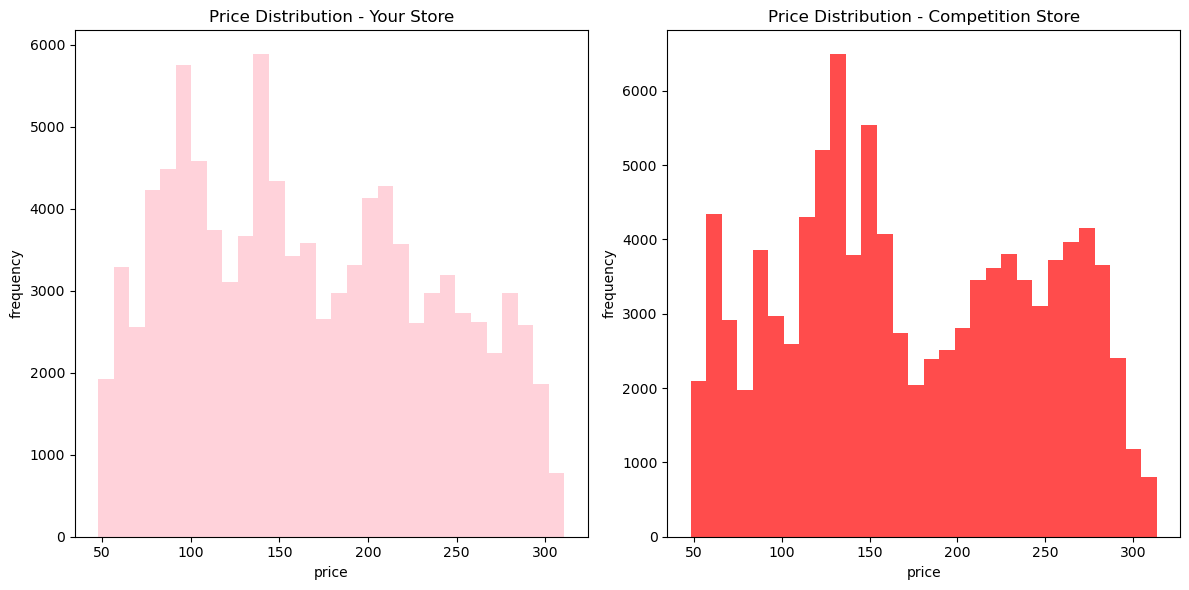

In [4]:
# comparing price distribution with competition_price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(dataset['Price'], bins =30, alpha=0.7, label='Your Store', color ='pink')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1,2,2)
plt.hist(dataset['Competition_Price'], bins =30, alpha=0.7, label='Competition Store', color ='red')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution - Competition Store')
plt.tight_layout()


plt.show()

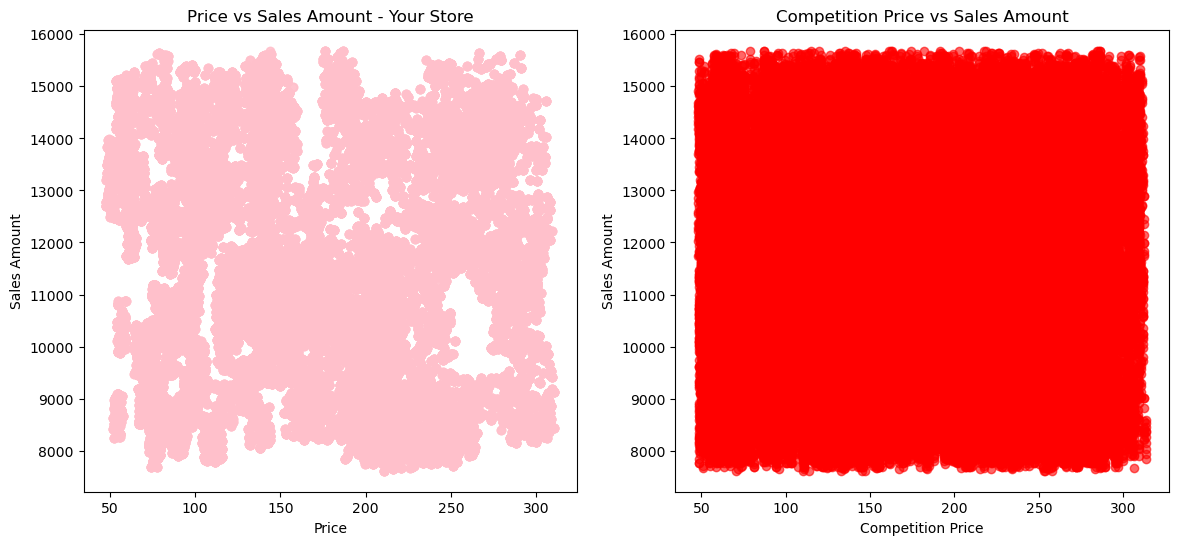

In [5]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(dataset['Price'],dataset['Sales_Amount'],alpha = 0.6, label='Your_Store',color = 'pink')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Your Store')

plt.subplot(1,2,2)
plt.scatter(dataset['Competition_Price'],dataset['Sales_Amount'],alpha = 0.6, label='Competition_Store',color = 'red')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.show()

In [6]:
# Competiton has more effective pricing stategy which maintain higher sales amounts more uniformly  

Grouping and aggregation successful.
First few entries after grouping and aggregation:
  Fiscal_Week_ID       Price  Competition_Price
0        2019-11  166.352333         175.018236
1        2019-12  166.486184         173.169854
2        2019-13  169.865254         173.161543
3        2019-14  164.892479         174.914615
4        2019-15  167.455556         175.189035


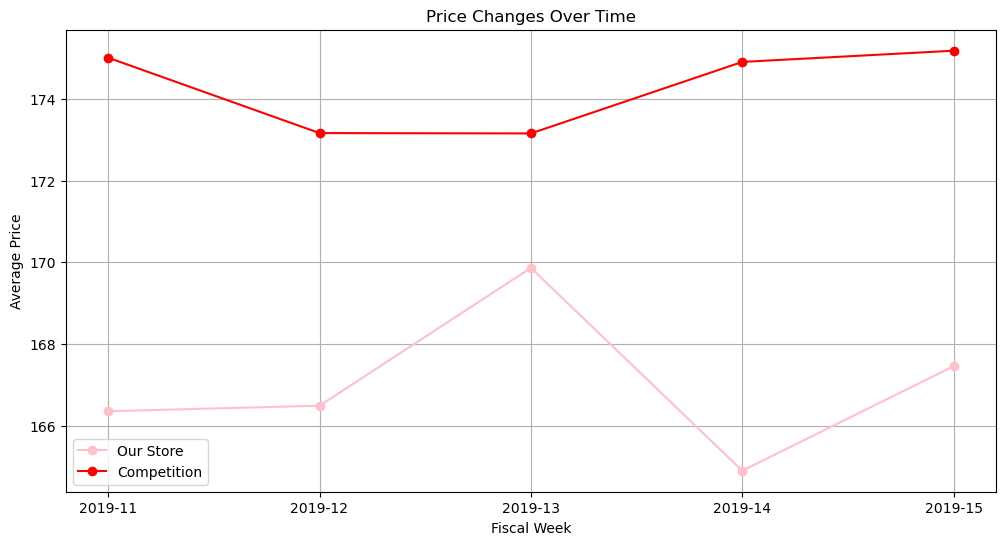

Plotting successful.


In [7]:
# comparing the price changes over time 
# Group Data by Fiscal Week and Calculate Mean Prices
try:
    weekly_prices = dataset.groupby('Fiscal_Week_ID').agg({
        'Price': 'mean',
        'Competition_Price': 'mean'
    }).reset_index()
    print("Grouping and aggregation successful.")
except Exception as e:
    print("Error in grouping and aggregation:", e)

# Verify the grouping and aggregation
print("First few entries after grouping and aggregation:")
print(weekly_prices.head())

# Plot the Data
try:
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o', color='pink')
    plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='red')
    
    plt.xlabel('Fiscal Week')
    plt.ylabel('Average Price')
    plt.title('Price Changes Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Plotting successful.")
except Exception as e:
    print("Error in plotting:", e)


In [8]:
# competition has higher prices but consistent -- more stable pricing strategy
# The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

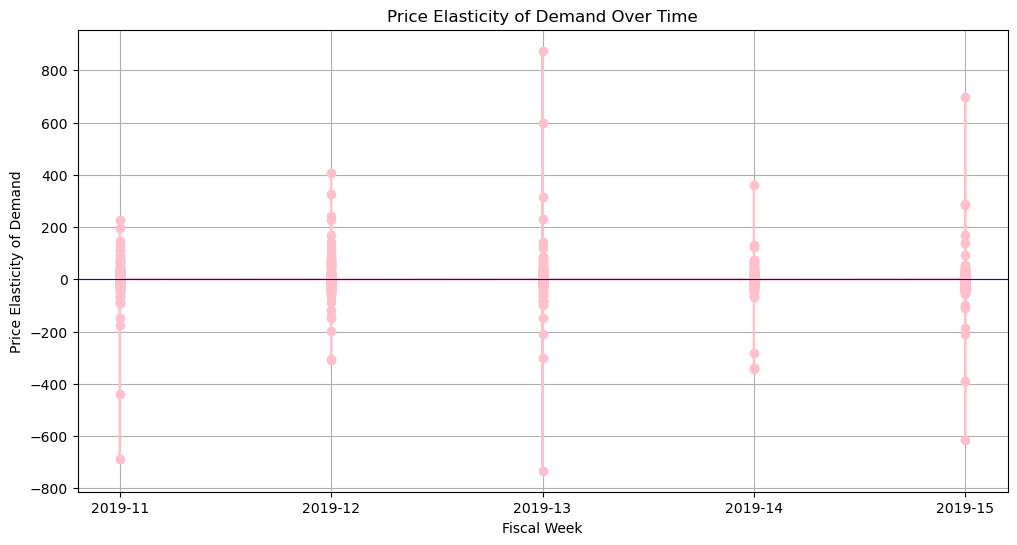

In [9]:
# calculate how changes in price affect changes in quantity sold
# calculate price elasticity
#### Ed = % change in quantity demanded / % change in price

dataset['price_change'] = dataset['Price'].pct_change()
dataset['qty_change'] = dataset['Item_Quantity'].pct_change()

dataset['elasticity'] = dataset['qty_change']/ dataset['price_change']

# replacing infinite values in the dataset 
dataset.replace([np.inf,-np.inf],np.nan,inplace=True)
dataset.dropna(subset=['elasticity'],inplace= True)

plt.figure(figsize=(12, 6))
plt.plot(dataset['Fiscal_Week_ID'], dataset['elasticity'], marker='o', linestyle='-', color='pink')
plt.axhline(0, color='blue', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

In [10]:
# this highlights significant variability in elasticity across different 
# weeks with values ranging from highly +ve to highly -ve
#  High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes
#  The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

In [11]:
# Comparing total sales amount of your store and competition

totalSales = dataset['Sales_Amount'].sum()
TS_competition = (dataset['Item_Quantity']*dataset['Competition_Price']).sum()

total_qty = dataset['Item_Quantity'].sum()
totQty_comp = dataset['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Columns':['Total Sales Amount','Total Quantity Sold'],
    'Your Store':[totalSales, total_qty],
    'Competition':[TS_competition,totQty_comp]
    
})

summary

,Columns,Your Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [12]:
# total sales amt comp > our store:::: competition store pricing strtegy is more effective in generating revenue

In [13]:
#analyzing how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms our store

In [14]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

dataset['price_bracket'] = pd.cut(dataset['Price'],bins=bins, labels = labels, right= False)
dataset['competition_price_bracket'] = pd.cut(dataset['Competition_Price'],bins=bins, labels = labels, right= False)

sales_by_bracket_your_store = dataset.groupby('price_bracket')['Sales_Amount'].sum().reset_index()  #Groups the data by price_bracket and sums the Sales_Amount for each bracket.
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

dataset['competition_sales_amt'] = dataset['Competition_Price'] * dataset['Item_Quantity']
sales_by_bracket_competition = dataset.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store,sales_by_bracket_competition, on= 'Price Bracket')

sales_by_bracket


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [15]:
# dynamic pricing model --- add segments to dataset to add price elasticity to each segment 
# ---create segment based on purchasing behaviour and calculate price elasticity 
# ---define dynamic pricing rules based on competitor pricing ,d emand and elasticity
# ---compare the model with existing pricing strategy

In [16]:
# avg price and total quantity sold for eeach item
item_summary = dataset.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

In [17]:
# merge the item_summary back to main dataset
dataset = pd.merge(dataset,item_summary,on = 'Item_ID', suffixes=('', '_avg'))

In [18]:
# create segments based on avg pricing 
dataset['segment'] = pd.cut(dataset['Price_avg'], bins=[0,50,150,300], labels =['Low', 'Medium', 'High'])


In [19]:
# calculate price elasticity
segments = dataset['segment'].unique()
elasticity_data =[]

In [20]:
for segment in segments:
    segment_data = dataset[dataset['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

/var/folders/j8/p701x6p968532bqxndp59q980000gn/T/ipykernel_32925/1084841499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
/var/folders/j8/p701x6p968532bqxndp59q980000gn/T/ipykernel_32925/1084841499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
/var/folders/j8/p701x6p968532bqxndp59q980000gn/T/ipykernel_32925/1084841499.py:5: SettingWithCopyWarning: 
A value is 

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


In [21]:
dynamic_pricing_data = dataset.copy()

# applying dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

In [22]:
# new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

In [23]:
# comparing total sales amount between existing and dynamic pricing
total_sales_existing = dataset['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

In [24]:
# comparing total quantity sold between existing and dynamic pricing
total_qty_existing = dataset['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

In [25]:
comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

In [26]:
comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [27]:
dataset['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [28]:
dataset

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-11,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-11,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99915,2019-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium,58.2960
9987,99922,2019-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium,56.8995
9988,99929,2019-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium,55.3770
9989,99936,2019-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium,58.9995
